[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlkwamesarfo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed: 278 lines by WALLACE, 363 lines by TRUMP, 292 lines by BIDEN and 291 lines not directly named

Processing TRUMP statements:
..... the number of items is : 906
..... the number of items after removing stop words and "trump" and  "nt" is: 797

Processing BIDEN statements:
..... the number of items is : 901
..... the number of items after removing stop words and "trump" and  "nt" is: 797

BIDEN--WORD--COUNT
   Biden word  Biden count
0      people           45
1       going           25
2        true           22
3        well           21
4        fact           21
5         way           21
6        said           19
7        look           18
8        deal           18
9        know           17
10        get           16
11     number           14
12       want           13
13       plan           13
14  president           12
15        say           12
16        one           12
17      would           12
18    totally           12
19       back           11
20       take 

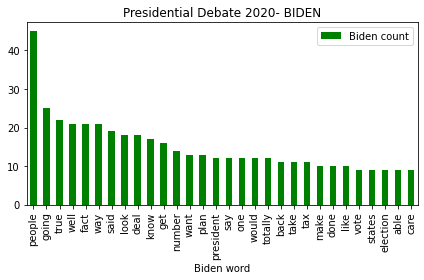

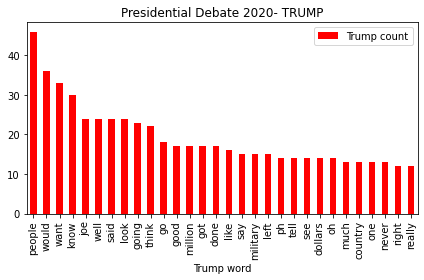

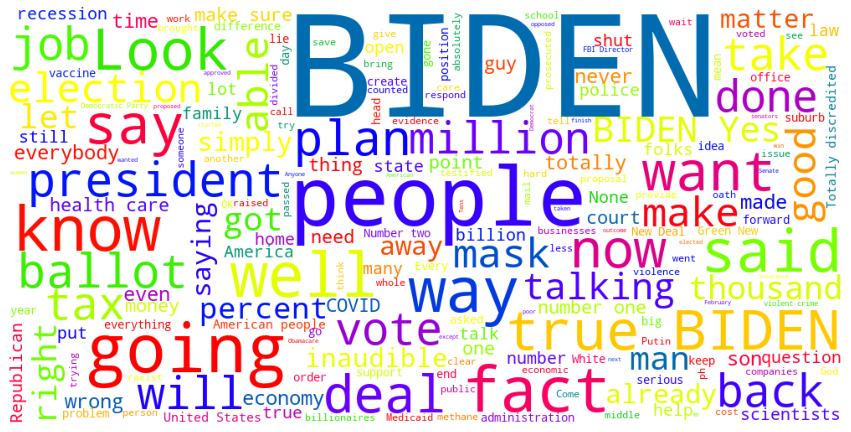

The word cloud was written to file and looks like this:



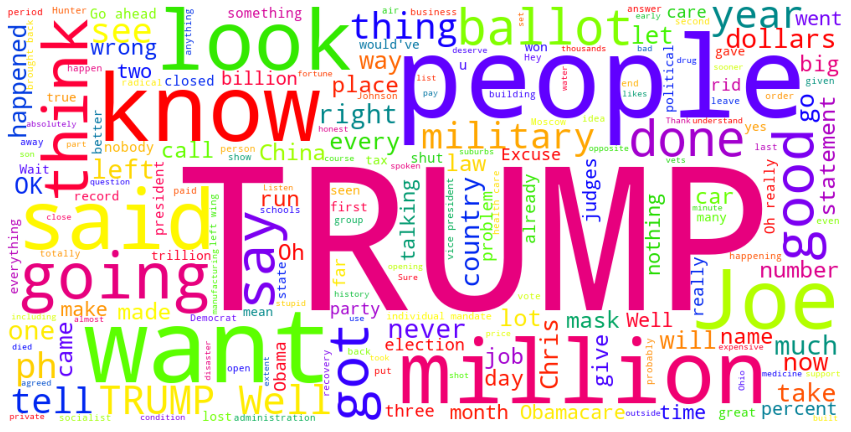

wordcloud for  candidate TRUMP with elephant as the shape


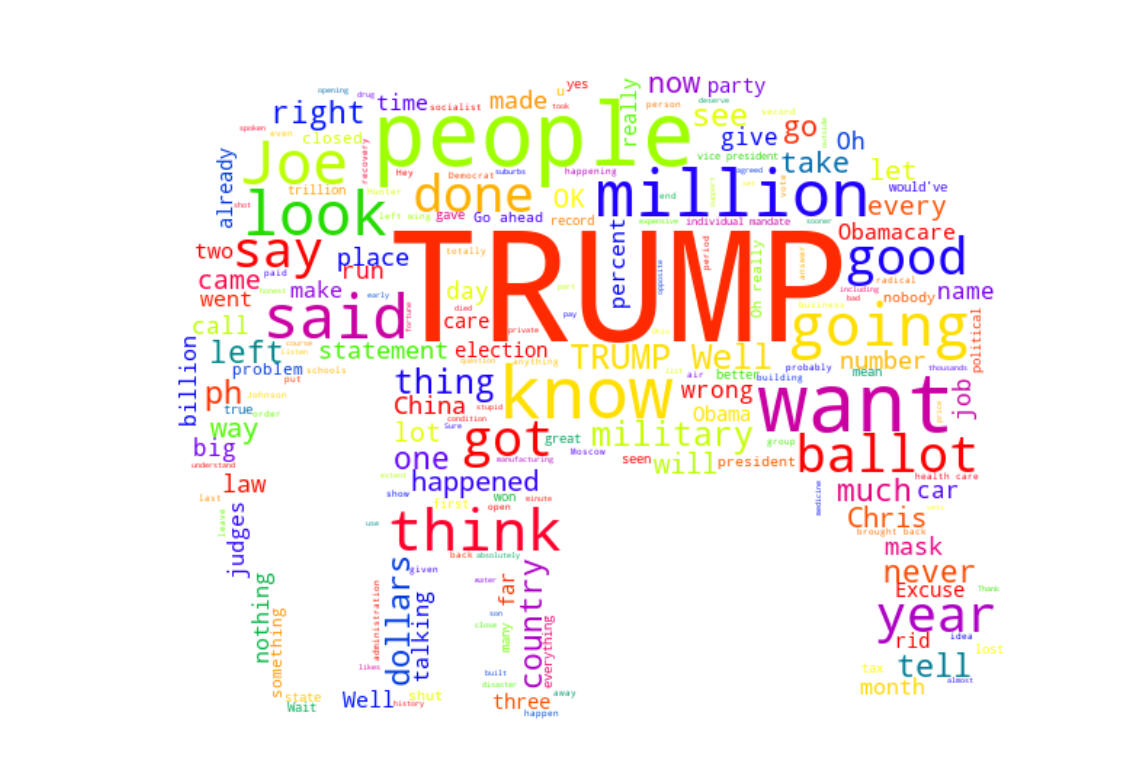


wordcloud for candidate BIDEN with donkey as the shape


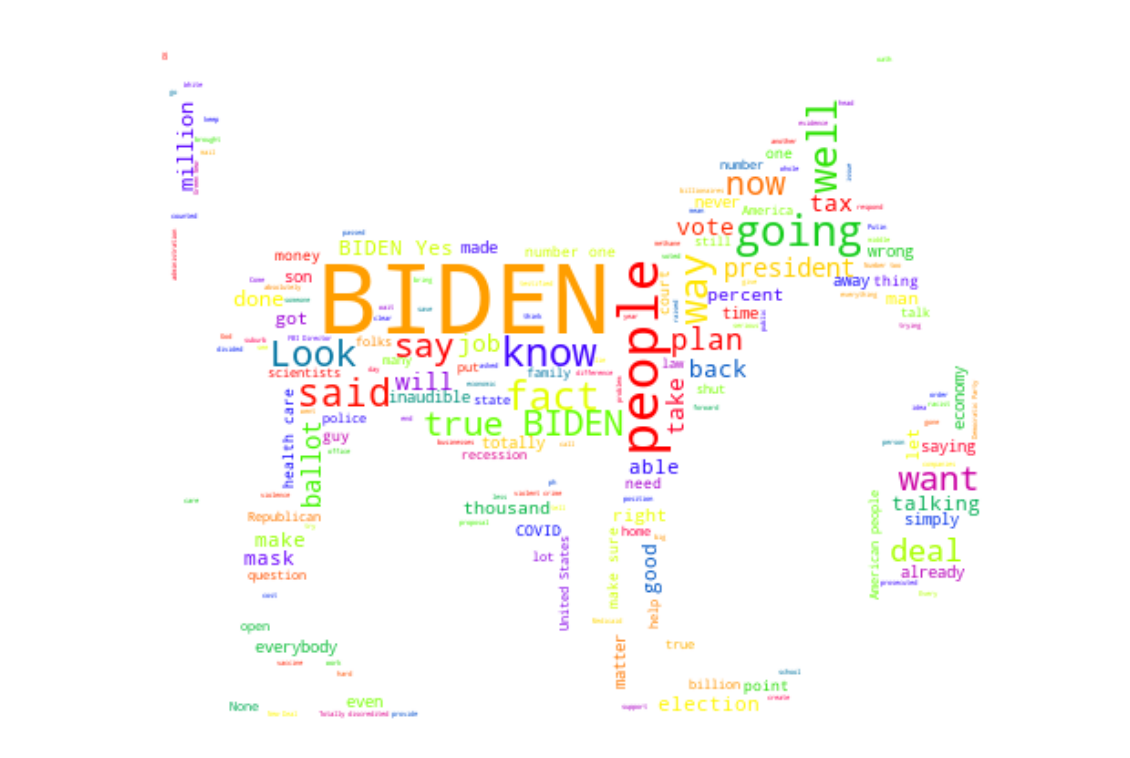

quantitattive analysis on biden text
 Flesch-Kincaid score: 2.14
 Simple Measure of Gobbledygook  score: 5.13
 Gunning Fog score: 6.73

quantitattive analysis on trump text
 Readability Flesch-Kincaid score: 1.79
 Readability Simple Measure of Gobbledygook score: 4.58
 Readability Gunning Fog score: 6.31


In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from pathlib import Path
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import BlanklineTokenizer
import pandas as pd
from nltk.corpus import stopwords
from operator import itemgetter
import numpy as np
from PIL import Image
from textatistic import Textatistic
#########PART A : open and read a file################
##opening and reading text file 
raw_text= Path('presidential_debate_transcript.txt').read_text()
#print(raw_text)
#splitting into paragraphs
tokenizer= BlanklineTokenizer()
blob= TextBlob(raw_text)
para_list= blob.tokenize(tokenizer)
#print(para_list)


##########PART B: splitting paragraph list into separate lists by speaker################
text_biden = []
text_trump = []
text_wallace = []
text_cross = []
for line in para_list:
    if line.startswith('TRUMP'):
        text_trump.append(line)
    elif line.startswith('BIDEN'):
        text_biden.append(line)
    elif line.startswith('WALLACE'):
        text_wallace.append(line)
    else:
        text_cross.append(line)       
#print(len(text_biden))
#print(len(text_trump))
#print(len(text_wallace))
print('Processed:',(len(text_wallace)) ,'lines by WALLACE,',(len(text_trump)), 'lines by TRUMP,',(len(text_biden)),'lines by BIDEN and',(len(text_cross)), 'lines not directly named')
print()
##########PART C: removing stop words speaker names and n't#################
text_biden = ','.join(text_biden)
text_trump = ','.join(text_trump)

biden_1= text_biden.replace('BIDEN','')
trump_1 = text_trump.replace('TRUMP','')

Biden_blob= TextBlob(text_biden)
Trump_blob= TextBlob(text_trump)

Biden_blob= Biden_blob.replace('BIDEN','')
Trump_blob= Trump_blob.replace('TRUMP','')

Biden_blob= Biden_blob.replace("n't",'')
Trump_blob= Trump_blob.replace("n't",'')

biden_items= Biden_blob.word_counts.items()
trump_items=Trump_blob.word_counts.items()


stop_words = stopwords.words('english')
stop_b= [eachword for eachword in biden_items if eachword[0] not in stop_words]
stop_t= [eachword for eachword in trump_items if eachword[0] not in stop_words]

print('Processing TRUMP statements:')
print('..... the number of items is :',len(trump_items))
print('..... the number of items after removing stop words and "trump" and  "nt" is:', len(stop_t))
print()
print('Processing BIDEN statements:')
print('..... the number of items is :',len(biden_items))
print('..... the number of items after removing stop words and "trump" and  "nt" is:', len(stop_b))
print()
#########PART D: Quantitative Data Visualization##################
sorted_biden_items= sorted(stop_b, key= itemgetter(1), reverse= True)
top30_words_biden=  sorted_biden_items[0:30]
df_biden= pd.DataFrame(top30_words_biden, columns=['Biden word', 'Biden count'] )
print('===================')
print('BIDEN--WORD--COUNT')
print('===================')
print(df_biden)
print()
axes= df_biden.plot.bar(x= 'Biden word', y= 'Biden count', title= 'Presidential Debate 2020- BIDEN', color= 'green')
plt.gcf().tight_layout()

sorted_trump_items= sorted(stop_t, key= itemgetter(1), reverse= True)
top30_words_trump=  sorted_trump_items[0:30]
df_trump= pd.DataFrame(top30_words_trump, columns=['Trump word', 'Trump count'] )
print('===================')
print('TRUMP--WORD--COUNT')
print('===================')
print(df_trump)
axes= df_trump.plot.bar(x= 'Trump word', y= 'Trump count', title= 'Presidential Debate 2020- TRUMP',color= 'red')
plt.gcf().tight_layout()

#########PART E#################

print()
###WORD CLOUD FOR BIDEN########
wordcloud= WordCloud(width=1000,height=500,colormap='prism', background_color='white').generate(text_biden)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("BIDEN"+".png", bbox_inches='tight')
plt.show()
print('The word cloud was written to file and looks like this:')
print()

#####WORD CLOUD FOR TRUMP#####
wordcloud= WordCloud(width=1000,height=500,colormap='prism', background_color='white').generate(text_trump)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("TRUMP"+".png", bbox_inches='tight')
plt.show()

###wordcloud of candidate TRUM with elephant as the shape###
print('=======================================================')
print('wordcloud for  candidate TRUMP with elephant as the shape')
print('=======================================================')
mask= np.array(Image.open("/Users/carlkwamesarfo/Downloads/elephant.png"))
wordcloud= WordCloud(width=1000,height=500,colormap='prism', background_color='white', mask=mask).generate(text_trump)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.savefig('TRUMP.png', format= "png")
plt.show()

print()
###wordcloud of candidate BIDEN with donkey as the shape###
print('=======================================================')
print('wordcloud for candidate BIDEN with donkey as the shape')
print('=======================================================')
mask= np.array(Image.open("/Users/carlkwamesarfo/Downloads/donkey.png"))
wordcloud= WordCloud(width=1000,height=500,colormap='prism', background_color='white', mask=mask).generate(text_biden)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.savefig('BIDEN.png', format= "png")
plt.show()

####PART F: Quantitative Data Analysis#######
print('=====================================')
print('quantitattive analysis on biden text')
print('=====================================')
readability_biden= Textatistic(text_biden)
score_biden= readability_biden.dalechall_score
print(f' Flesch-Kincaid score: {readability_biden.fleschkincaid_score:0.2f}')
print(f' Simple Measure of Gobbledygook  score: {readability_biden.gunningfog_score:0.2f}')
print(f' Gunning Fog score: {readability_biden.smog_score:0.2f}')
print()
print('=====================================')
print('quantitattive analysis on trump text')
print('=====================================')
readability_trump= Textatistic(text_trump)
score_trump= readability_trump.dalechall_score
print(f' Readability Flesch-Kincaid score: {readability_trump.fleschkincaid_score:0.2f}')
print(f' Readability Simple Measure of Gobbledygook score: {readability_trump.gunningfog_score:0.2f}')
print(f' Readability Gunning Fog score: {readability_trump.smog_score:0.2f}')

